# Úkol č. 2 - regrese

* Termíny jsou uvedeny na [courses.fit.cvut.cz](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s regresní úlohou, s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí délky dožití v různých zemích a letech.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:

* Year - Rok
* Status - Status rozvinuté nebo rozvojové země
* Life expectancy - Délka dožití v letech - **cílová proměnná, kterou budete predikovat**
* Adult Mortality - Úmrtnost dospělých bez ohledu na pohlaví (pravděpodobnost, že osoby, které dosáhly věku 15 let, zemřou před dosažením věku 60 let (uvedeno na 1 000 osob)).
* infant deaths - počet zemřelých kojenců na 1000 obyvatel
* Alcohol - Alkohol, zaznamenaná spotřeba na obyvatele (15+) (v litrech čistého alkoholu)
* percentage expenditure - Výdaje na zdravotnictví v procentech hrubého domácího produktu na obyvatele (%)
* Hepatitis B - pokrytí očkováním proti hepatitidě B (HepB) u dětí ve věku 1 roku (%)
* Measles - Spalničky - počet hlášených případů na 1000 obyvatel
* BMI - průměrný index tělesné hmotnosti celé populace
* under-five deaths - počet úmrtí dětí do pěti let na 1000 obyvatel
* Polio - proočkovanost proti dětské obrně (Pol3) u dětí ve věku 1 roku (%)
* Total expenditure - Výdaje vládních institucí na zdravotnictví jako procento celkových vládních výdajů (%)
* Diphtheria - pokrytí očkováním proti záškrtu, tetanu a černému kašli (DTP3) u jednoletých dětí (%)
* HIV/AIDS - počet úmrtí na 1 000 živě narozených dětí na HIV/AIDS (0-4 roky)
* GDP - hrubý domácí produkt na obyvatele (v USD)
* Population - počet obyvatel země
* thinness 1-19 years - podíl dětí ve věku 10-19 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* thinness 5-9 years - podíl dětí ve věku 5-9 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* Income composition of resources - Index lidského rozvoje z hlediska příjmového složení zdrojů (index v rozmezí 0 až 1)
* Schooling - počet let školní docházky (roky)


## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném regresním modelu.
    * Nějakým způsobem se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace. Vše stručně ale náležitě komentujte.
<br /><br />
  * Vytvořte **vlastní implementaci náhodného lesa**. Použijte k tomu níže předpřipravenou kostru.
  
  * Na připravená data postupně aplikujte Vaši předchozí implementaci modelu náhodného lesa, dále jeden z modelů **lineární regrese** nebo **hřebenové regrese**, a alespoň jeden další model podle Vašeho uvážení, přičemž pro každý z těchto modelů přiměřeně:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Experimentujte s normalizací (standardizace/min-max), pokud pro daný model očekáváte její příznivý vliv.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty (vzhledem k RMSE).
    * Pro model s nejlepšími hodnotami hyperparametrů určete jeho chybu pomocí RMSE a MAE. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.
<br /><br />
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a odhadněte, jakou chybu (RMSE) můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tato data. Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte s využitím tří sloupců: **Country**, **Year** a **Life expectancy**. Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka prvních řádků souboru `results.csv`:
  
```
Country,Year,Life expectancy
Peru,2012,71.4
Peru,2013,72.6
...
```


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

# Import Libraries

This section imports all necessary libraries and tools that will be used in the project.

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# CustomRandomForest class

The `CustomRandomForest` class is an implementation of the Random Forest algorithm for regression problems:

- `__init__`: The constructor of the class, which accepts the basic hyperparameters

- `fit`: Method for training the model

- `predict`: A method for performing predictions. It collects predictions from all decision trees and calculates the average to obtain the final model prediction

```python
class CustomRandomForest:
    def __init__(self, n_estimators=100, max_samples=0.5, max_depth=None, random_state=None):
        # Initialization of a class with hyperparameters
        ...

    def fit(self, X, y):
        # Training the model on training data
        ...

    def predict(self, X):
        # Obtaining and averaging predictions from all trees
        ...


In [2]:
class CustomRandomForest:
    def __init__(self, n_estimators=100, max_samples=0.5, max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []
        
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            bootstrap_indices = np.random.choice(np.arange(len(X)), size=int(self.max_samples * len(X)), replace=True)
            X_sample = X.iloc[bootstrap_indices]
            y_sample = y.iloc[bootstrap_indices]
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X)
        
        return np.mean(predictions, axis=1)


# Loading Data

In [3]:
data = pd.read_csv('data.csv')

# Analyzing data

In [4]:
print(data.head())


       Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0             

In [5]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
# General information about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2564 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2188 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2692 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

In [7]:
print(data.describe())


              Year  Life expectancy  Adult Mortality  infant deaths  \
count  2718.000000      2718.000000      2718.000000    2718.000000   
mean   2007.113687        69.204525       164.432303      30.825239   
std       4.537979         9.612530       125.512789     121.786599   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2003.000000        63.100000        73.250000       0.000000   
50%    2007.000000        72.200000       142.000000       3.000000   
75%    2011.000000        75.800000       227.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2564.000000             2718.000000  2188.000000    2718.000000   
mean      4.672512              757.071658    80.884826    2370.999632   
std       4.051664             2007.472092    25.010075   11174.241799   
min       0.010000                0.000000     1.000000       0.

In [8]:
print(data.nunique())

Country                             183
Year                                 16
Status                                2
Life expectancy                     359
Adult Mortality                     423
infant deaths                       195
Alcohol                            1055
percentage expenditure             2185
Hepatitis B                          87
Measles                             909
BMI                                 600
under-five deaths                   239
Polio                                73
Total expenditure                   792
Diphtheria                           81
HIV/AIDS                            197
GDP                                2317
Population                         2110
thinness  1-19 years                194
thinness 5-9 years                  200
Income composition of resources     613
Schooling                           173
dtype: int64


# Visualization for full and better presentation and understanding of data

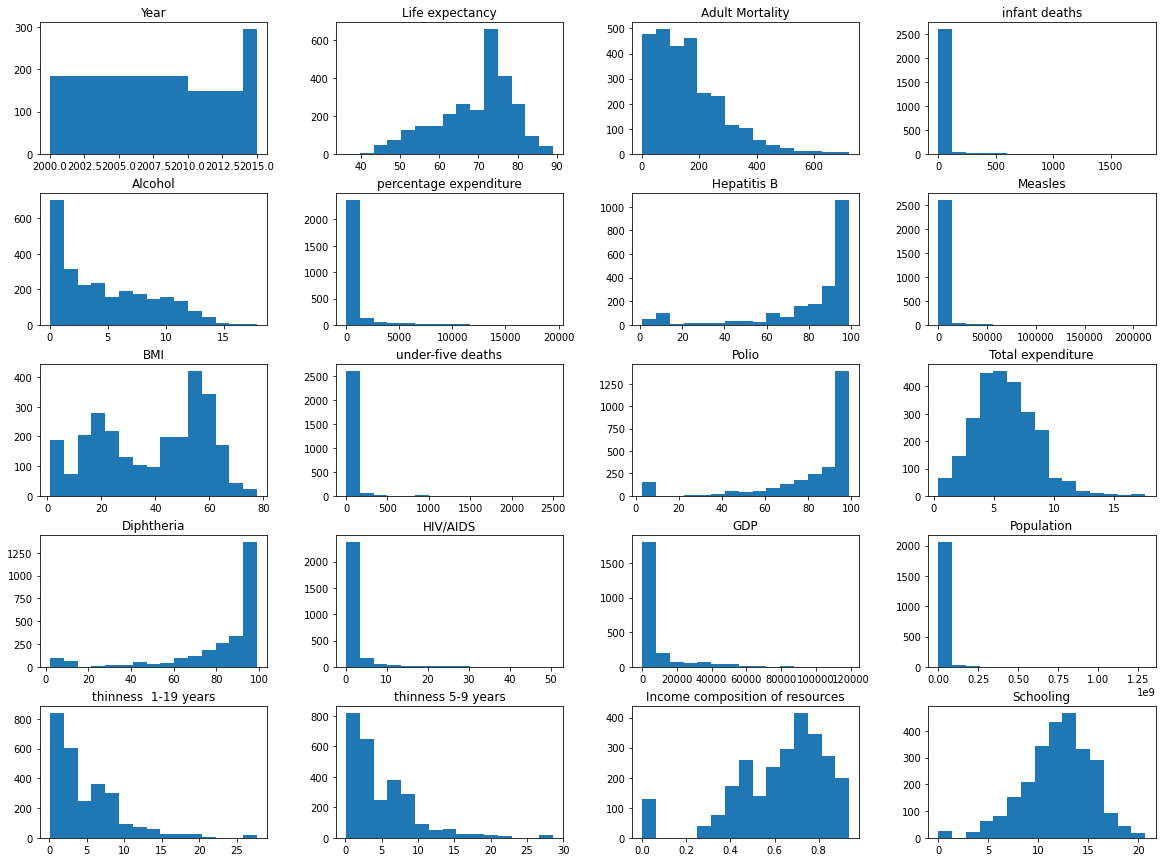

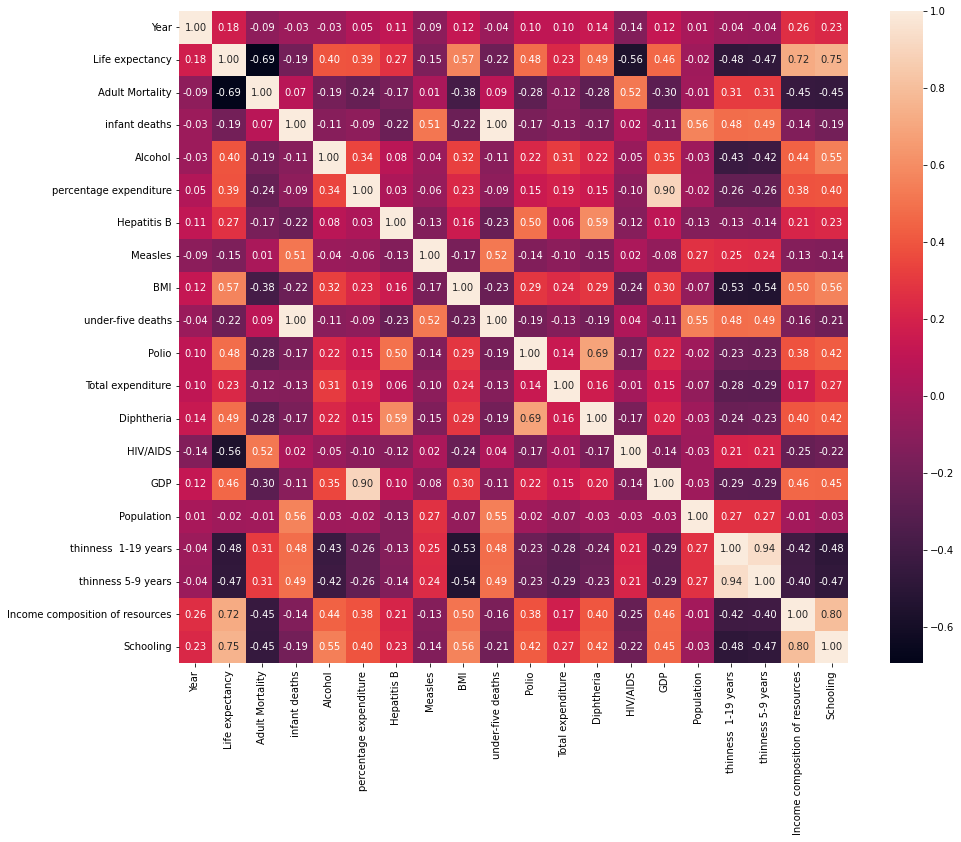

In [9]:
selected_columns = ['Year','Life expectancy','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI','under-five deaths','Polio','Total expenditure','Diphtheria','HIV/AIDS','GDP','Population','thinness  1-19 years','thinness 5-9 years','Income composition of resources','Schooling']
selected_data = data[selected_columns]

selected_data.hist(bins=15, figsize=(20, 15), grid=False)
plt.show()

plt.figure(figsize=(15, 12))
sns.heatmap(selected_data.corr(), annot=True, fmt=".2f")
plt.show()



# Data processing

Filling missing values with averages and checking for missing values

In [10]:
for column in ['Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 
               'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years', 
               'thinness 5-9 years', 'Income composition of resources', 'Schooling']:
    data[column].fillna(data[column].mean(), inplace=True)

print(data.isnull().sum())


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


# Conversion of Categorical Data

To prepare the data for modeling, it is necessary to convert the categorical attributes into a numeric format. This is done through the following steps:

1. **Converting the 'Status'** Column:  Convert each unique category into a separate column with binary values (0 or 1)

2. **Coding the 'Country'** Column: Each unique value is coded with a numeric index.

In [11]:
data = pd.get_dummies(data, columns=['Status'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Country'] = le.fit_transform(data['Country'])


# Scaling numeric features

`MinMaxScaler` converts each feature so that its values are between 0 and 1


In [12]:
scaler = MinMaxScaler()
data[['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 
      'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 
      'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 
      'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 
      'Schooling']] = scaler.fit_transform(data[['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 
                                                 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 
                                                 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 
                                                 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 
                                                 'thinness 5-9 years', 'Income composition of resources', 
                                                 'Schooling']])


In [13]:
data.head(7)

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,0,1.000000,65.0,0.362881,0.034444,0.0,0.003659,0.653061,0.005439,0.236292,...,0.649485,0.0,0.004889,0.026074,0.619565,0.603509,0.510661,0.487923,False,True
1,0,0.933333,59.9,0.373961,0.035556,0.0,0.003774,0.622449,0.002319,0.229765,...,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.507463,0.483092,False,True
2,0,0.866667,59.9,0.369806,0.036667,0.0,0.003759,0.642857,0.002027,0.223238,...,0.639175,0.0,0.005287,0.024525,0.637681,0.617544,0.501066,0.478261,False,True
3,0,0.800000,59.5,0.375346,0.038333,0.0,0.004014,0.673469,0.013135,0.216710,...,0.670103,0.0,0.005608,0.002857,0.644928,0.628070,0.493603,0.473430,False,True
4,0,0.733333,59.2,0.379501,0.039444,0.0,0.000364,0.683673,0.014200,0.211488,...,0.680412,0.0,0.000519,0.002302,0.655797,0.635088,0.484009,0.458937,False,True
5,0,0.666667,58.8,0.385042,0.041111,0.0,0.004090,0.663265,0.009374,0.204961,...,0.659794,0.0,0.004629,0.002228,0.663043,0.642105,0.477612,0.444444,False,True
6,0,0.600000,58.6,0.387812,0.042778,0.0,0.002914,0.632653,0.013484,0.198433,...,0.628866,0.0,0.003728,0.000220,0.670290,0.652632,0.462687,0.429952,False,True


# Preparing Data for Model Training

Before starting model training, you must prepare the data by dividing it into predictors (independent variables) and target variable, and into training, validation, and test sets.

## Definition of Predictors and Target Variable

- `X`: Predictors (all columns except the target variable 'Life expectancy').
- `y`: The target variable 'Life expectancy' that we will predict.

## Data Separation

1. **Training and Time Sets**:
   The data is first split into training set (80%) and time set (20%). The training set is used for model training and the time set will be further divided into validation and test set.

2. **Validation and Test Sets**:
   The temporal set is split in half into validation and test sets (10% each of the entire dataset). The validation set is used for hyperparameter tuning and model estimation, and the test set is used for final evaluation of model performance.


In [14]:

X = data.drop('Life expectancy', axis=1) 
y = data['Life expectancy']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# CustomRandomForest Model Training

A custom random forest model `CustomRandomForest` with specified hyperparameters is created and trained here. This model is used to solve the regression problem.


In [15]:
forest_model = CustomRandomForest(n_estimators=100, max_samples=0.7, max_depth=10, random_state=42)


In [16]:
forest_model.fit(X_train, y_train)


In [17]:
predictions = forest_model.predict(X_val)


# CustomRandomForest Performance Evaluation

Calculation of RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) metrics to evaluate the performance of the CustomRandomForest model on validation data.


In [18]:
rmse = np.sqrt(mean_squared_error(y_val, predictions))
print(f"Root Mean Squared Error: {rmse}")

mae = mean_absolute_error(y_val, predictions)
print(f"Mean Absolute Error: {mae}")


Root Mean Squared Error: 1.781713139805435
Mean Absolute Error: 1.183718518523312


# Linear Regression

Create, train, and estimate a linear regression model.

In [19]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_predictions = linear_model.predict(X_val)

linear_rmse = np.sqrt(mean_squared_error(y_val, linear_predictions))
linear_mae = mean_absolute_error(y_val, linear_predictions)
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Linear Regression MAE: {linear_mae}")


Linear Regression RMSE: 4.002913629765186
Linear Regression MAE: 2.997935103332579


# Ridge Regression

Training and estimation of a ridge regression model with a given hyperparameter `alpha`.

In [20]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

ridge_predictions = ridge_model.predict(X_val)

ridge_rmse = np.sqrt(mean_squared_error(y_val, ridge_predictions))
ridge_mae = mean_absolute_error(y_val, ridge_predictions)
print(f"Ridge Regression RMSE: {ridge_rmse}")
print(f"Ridge Regression MAE: {ridge_mae}")


Ridge Regression RMSE: 4.0847899632721045
Ridge Regression MAE: 3.0861339008512036


# Random Forest optimization with GridSearchCV

Using `GridSearchCV` to find the optimal hyperparameters of the `RandomForestRegressor` model. Finding the best parameters and training the model on those parameters.

In [21]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'max_features': ['sqrt', 'log2', None]#,
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

rf_predictions = best_rf_model.predict(X_val)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_predictions))
print(f"Optimized Random Forest RMSE: {rf_rmse}")


Optimized Random Forest RMSE: 1.6978423517852006


# Gradient Boosting Regressor

Here we create and train the Gradient Boosting Regressor model. This ensemble learning method uses multiple decision trees to create a more powerful predictive model.


In [22]:
gb = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

gb_predictions = gb.predict(X_val)
gb_rmse = np.sqrt(mean_squared_error(y_val, gb_predictions))
print(f"Gradient Boosting RMSE: {gb_rmse}")


Gradient Boosting RMSE: 2.035964271314526


In [23]:
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_val)
xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_predictions))
print(f"XGBoost RMSE: {xgb_rmse}")


XGBoost RMSE: 2.0001733552615373


# Ridge Regression Optimization

Using GridSearchCV to optimize the hyperparameters of a ridge regression model. After finding the best parameters, the model is trained with those parameters and estimated.

In [24]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_reg = Ridge()
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best hyperparameters for ridge regression:", grid_search.best_params_)


Best hyperparameters for ridge regression: {'alpha': 0.01}


In [25]:
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

ridge_predictions = ridge_model.predict(X_val)

ridge_rmse = np.sqrt(mean_squared_error(y_val, ridge_predictions))
ridge_mae = mean_absolute_error(y_val, ridge_predictions)
print(f"Optimized Ridge Regression RMSE: {ridge_rmse}")
print(f"Optimized Ridge Regression MAE: {ridge_mae}")

Optimized Ridge Regression RMSE: 4.021572892300476
Optimized Ridge Regression MAE: 3.020336824318128


# Linear Regression with Polynomial Signs

Here we apply linear regression using polynomial features to improve the accuracy of the model. Polynomial features allow the model to better capture non-linear dependencies.

In [26]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

pipe = Pipeline([
    ('polynomial_features', polynomial_converter),
    ('linear_regression', LinearRegression())
])

pipe.fit(X_train, y_train)

predictions = pipe.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, predictions))
print(f"RMSE for linear regression with polynomial signs: {rmse}")


RMSE for linear regression with polynomial signs: 3.412776079181019


# Gradient Boosting Optimization

Running GridSearchCV to determine the best hyperparameters for the Gradient Boosting Regressor model. Once the optimal parameters are found, the model is trained and evaluated on a validation dataset.

In [27]:
gbr = GradientBoostingRegressor(random_state=42)


In [28]:
gbr.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [29]:
gbr_predictions = gbr.predict(X_val)

gbr_rmse = np.sqrt(mean_squared_error(y_val, gbr_predictions))
gbr_mae = mean_absolute_error(y_val, gbr_predictions)

print(f"Gradient Boosting RMSE: {gbr_rmse}")
print(f"Gradient Boosting MAE: {gbr_mae}")


Gradient Boosting RMSE: 2.035964271314526
Gradient Boosting MAE: 1.497404275944854


In [30]:
# Set the grid of hyperparameters to be tested
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6]
}


In [31]:
gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [32]:
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

best_gbr = grid_search.best_estimator_


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 300}


In [33]:
gbr_predictions = best_gbr.predict(X_val)

gbr_rmse = np.sqrt(mean_squared_error(y_val, gbr_predictions))
print(f"Optimized Gradient Boosting RMSE: {gbr_rmse}")


Optimized Gradient Boosting RMSE: 1.6642419776899307


# Estimates Preparation and Prediction

Loading and preparing the estimated data, including filling in missing values, coding categorical variables, and scaling. Once the data is prepared, the best model is used to create predictions.


In [34]:
evaluation_data = pd.read_csv('evaluation.csv')

In [35]:
for column in ['Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 
               'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years', 
               'thinness 5-9 years', 'Income composition of resources', 'Schooling']:
    evaluation_data[column].fillna(evaluation_data[column].mean(), inplace=True)

print(evaluation_data.isnull().sum())


Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


In [36]:
original_data = evaluation_data[['Country', 'Year']].copy()

In [37]:
le = LabelEncoder()
evaluation_data['Country'] = le.fit_transform(evaluation_data['Country'])
evaluation_data = pd.get_dummies(evaluation_data, columns=['Status'])

scale_columns = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 
                 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 
                 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 
                 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 
                 'Schooling']

scaler = MinMaxScaler()

evaluation_data_scaled = scaler.fit_transform(evaluation_data[scale_columns])

evaluation_data[scale_columns] = evaluation_data_scaled



In [38]:
# Creating predictions
final_predictions = best_rf_model.predict(evaluation_data)

evaluation_data['Life expectancy'] = final_predictions


In [39]:
evaluation_data['Country'] = le.inverse_transform(evaluation_data['Country'].astype(int))


In [40]:
# results = evaluation_data[['Country', 'Year', 'Life expectancy']]
results = original_data.merge(evaluation_data[['Country', 'Life expectancy']], on='Country', how='left')

# Saving to CSV
results.to_csv('results.csv', index=False)


# Conclusion and Model Selection

After carefully analyzing and comparing various models including CustomRandomForest, Linear Regression, Ridge Regression, Gradient Boosting, and XGBoost, it was decided to select the **Random Forest** model for the final prediction.

## Reasons for Choosing Random Forest:

- **Resistance to Overfitting**: Random Forest has a natural robustness to overtraining, especially important in data-constrained environments. It does this by using multiple decision trees, making the model more generalizable and robust.

- **High Accuracy**: The Random Forest model has demonstrated excellent results on the RMSE and MAE metrics, confirming its ability to accurately predict the target variable.

- **Flexibility and Handling Diverse Data**: This model effectively handles both numerical and categorical data, which is important in the context of our analysis.

- **Interpretability**: Random Forest provides the ability to analyze the importance of traits, which can be useful in further understanding and interpreting the model.

Overall, Random Forest provides an excellent balance between accuracy, robustness to overfitting, and interpretability, making it an ideal choice for our current analysis and predictions.

```python
# Using the optimized Random Forest model for final prediction
best_rf_model = grid_search.best_estimator_
final_predictions = best_rf_model.predict(evaluation_data)
